In [1]:
"""
This viz_2 file is to visualize the data to determine distributions, and patterns related to the AMD stages

Section1 - import data
Section2 - show distributions plot (age_amd stage/gender_amd stage/genes expression)
Section3 - use dimension reduction method t-SNE 

And some package for this file is:
python 3.7
numpy 1.18.1
pandas 1.0.0
scikit-learn 0.22.2.post1
scipy 1.4.1
seaborn 0.10.0
matplotlib 3.1.3

"""

'\nThis viz_2 file is to visualize the data to determine distributions, and patterns related to the AMD stages\n\nSection1 - import data\nSection2 - show distributions plot (age_amd stage/gender_amd stage/genes expression)\nSection3 - use dimension reduction method t-SNE \n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA
from time import time

# Import data

In [3]:
df = pd.read_csv('train_genelevel_90%.tsv', sep='\t',index_col=0)
df.head()

,205_2,251_1,474_3,178_4,313_1,484_4,288_1,106_4,215_2,184_3,...,330_2,11_4,480_1,314_1,371_3,443_2,311_1,225_2,150_4,289_2
ENSG00000000419,202.0,243.00,230.0,270.0,232.00,231.00,174.00,164.00,244.0,207.0,...,257.00,274.00,230.00,327.00,252.0,285.0,237.00,223.0,278.00,159.0
ENSG00000000457,261.0,369.00,355.0,375.0,317.00,273.00,254.00,198.00,229.0,344.0,...,335.00,297.00,348.00,389.00,461.0,272.0,419.00,376.0,312.00,380.0
ENSG00000000460,194.0,188.00,234.0,236.0,385.00,154.00,144.00,253.00,218.0,214.0,...,331.00,198.00,192.00,274.00,251.0,322.0,364.00,129.0,322.00,252.0
ENSG00000000938,25.0,15.00,14.0,14.0,14.00,14.00,10.00,15.00,10.0,20.0,...,20.00,18.00,43.00,85.00,13.0,8.0,17.00,14.0,23.00,2.0
ENSG00000000971,428.0,91.06,83.0,184.0,167.78,138.79,105.76,196.97,236.0,61.0,...,118.77,163.48,200.57,266.55,175.0,344.0,146.84,67.0,367.51,97.0


In [4]:
retina = pd.read_csv('meta_retina.csv', index_col = [0])
retina.shape # 523

(523, 40)

In [5]:
sub_retina = pd.DataFrame(retina,columns = ['age','sex','mgs_level'])
sub_retina.head()

,age,sex,mgs_level
r_id,,,
1_2,61.0,M,2
2_1,77.0,F,1
3_1,81.0,F,1
4_1,88.0,F,1
5_1,75.0,F,1


In [6]:
df = sub_retina.join(df.T)
df.head()

,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
r_id,,,,,,,,,,,,,,,,,,,,,
1_2,61.0,M,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3_1,81.0,F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
5_1,75.0,F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape #523..

(523, 55172)

In [8]:
fclean = df.dropna(axis=0,how='any')
fclean.shape #407

(407, 55172)

In [9]:
fclean.head()

,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7_3,89.0,F,3,332.0,500.0,254.0,11.0,85.62,166.0,418.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8_2,72.0,F,2,193.0,257.0,120.0,30.0,215.83,77.0,301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Distributions

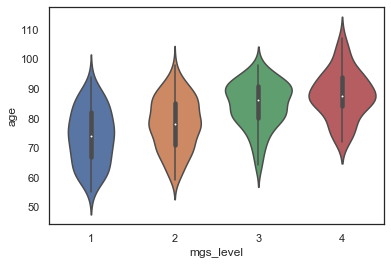

In [10]:
sns.set(color_codes = True)
sns.set_style("white")
sns.violinplot(x = fclean["mgs_level"], y = fclean["age"] )

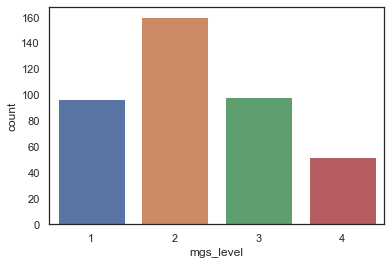

In [11]:
fig = sns.countplot(x = "mgs_level", data=fclean)
#fig.figure.savefig("count.png",dpi = 300) 
plt.show()

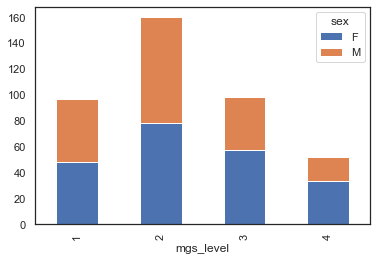

In [12]:
ct = pd.crosstab(fclean.mgs_level, fclean.sex)
ct.plot.bar(stacked=True)
plt.legend(title='sex')
plt.show()

In [13]:
dfn = pd.read_csv('train_genelevel_90%.tsv', sep='\t',index_col=0)
dfn.head()

,205_2,251_1,474_3,178_4,313_1,484_4,288_1,106_4,215_2,184_3,...,330_2,11_4,480_1,314_1,371_3,443_2,311_1,225_2,150_4,289_2
ENSG00000000419,202.0,243.00,230.0,270.0,232.00,231.00,174.00,164.00,244.0,207.0,...,257.00,274.00,230.00,327.00,252.0,285.0,237.00,223.0,278.00,159.0
ENSG00000000457,261.0,369.00,355.0,375.0,317.00,273.00,254.00,198.00,229.0,344.0,...,335.00,297.00,348.00,389.00,461.0,272.0,419.00,376.0,312.00,380.0
ENSG00000000460,194.0,188.00,234.0,236.0,385.00,154.00,144.00,253.00,218.0,214.0,...,331.00,198.00,192.00,274.00,251.0,322.0,364.00,129.0,322.00,252.0
ENSG00000000938,25.0,15.00,14.0,14.0,14.00,14.00,10.00,15.00,10.0,20.0,...,20.00,18.00,43.00,85.00,13.0,8.0,17.00,14.0,23.00,2.0
ENSG00000000971,428.0,91.06,83.0,184.0,167.78,138.79,105.76,196.97,236.0,61.0,...,118.77,163.48,200.57,266.55,175.0,344.0,146.84,67.0,367.51,97.0


In [14]:
dfn['mean'] = dfn.mean(axis = 1)
dfn.head()

,205_2,251_1,474_3,178_4,313_1,484_4,288_1,106_4,215_2,184_3,...,11_4,480_1,314_1,371_3,443_2,311_1,225_2,150_4,289_2,mean
ENSG00000000419,202.0,243.00,230.0,270.0,232.00,231.00,174.00,164.00,244.0,207.0,...,274.00,230.00,327.00,252.0,285.0,237.00,223.0,278.00,159.0,267.454545
ENSG00000000457,261.0,369.00,355.0,375.0,317.00,273.00,254.00,198.00,229.0,344.0,...,297.00,348.00,389.00,461.0,272.0,419.00,376.0,312.00,380.0,362.628428
ENSG00000000460,194.0,188.00,234.0,236.0,385.00,154.00,144.00,253.00,218.0,214.0,...,198.00,192.00,274.00,251.0,322.0,364.00,129.0,322.00,252.0,268.075872
ENSG00000000938,25.0,15.00,14.0,14.0,14.00,14.00,10.00,15.00,10.0,20.0,...,18.00,43.00,85.00,13.0,8.0,17.00,14.0,23.00,2.0,19.229214
ENSG00000000971,428.0,91.06,83.0,184.0,167.78,138.79,105.76,196.97,236.0,61.0,...,163.48,200.57,266.55,175.0,344.0,146.84,67.0,367.51,97.0,201.732531


In [15]:
dfn['mean'].describe()

count     55169.000000
mean        227.208894
std        2082.116133
min           0.000000
25%           0.002457
50%           0.199017
75%          33.795848
max      205085.325799
Name: mean, dtype: float64

In [16]:
bins = [0,25,50,100,300,600,900,1200,1500,2000,4000,8000,12000,16000,21000]
cats = pd.cut(dfn['mean'], bins)

In [17]:
def get_stats(group):
    return {'count': group.count()}

grouped = dfn['mean'].groupby(cats)
bin_counts = grouped.apply(get_stats).unstack()
#print (bin_counts)
bin_counts

,count
mean,
"(0, 25]",28633
"(25, 50]",1661
"(50, 100]",1832
"(100, 300]",3697
"(300, 600]",2756
"(600, 900]",1476
"(900, 1200]",872
"(1200, 1500]",537
"(1500, 2000]",539


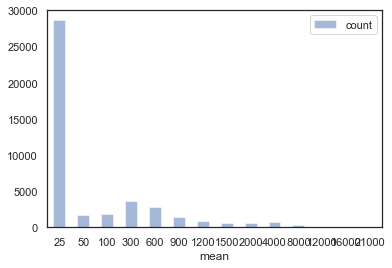

In [18]:
bin_counts.index = ['25', '50', '100', '300', '600', '900', '1200',
                    '1500', '2000', '4000','8000','12000','16000','21000']
bin_counts.index.name = 'mean'
bin_counts.plot(kind='bar', alpha=0.5, rot=0)

# Dimension Reduction

In [19]:
Y = TSNE(n_components = 2).fit_transform(fclean.drop(['age','sex','mgs_level'],axis=1))
Y.shape

(407, 2)

In [20]:
fclean['tsne-2d-one'] = Y[:,0]
fclean['tsne-2d-two'] = Y[:,1]
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,14.183018,9.606679
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.651057,2.944344
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.163983,18.495775
7_3,89.0,F,3,332.0,500.0,254.0,11.0,85.62,166.0,418.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-5.318102,-10.019666
8_2,72.0,F,2,193.0,257.0,120.0,30.0,215.83,77.0,301.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.570566,-8.793653


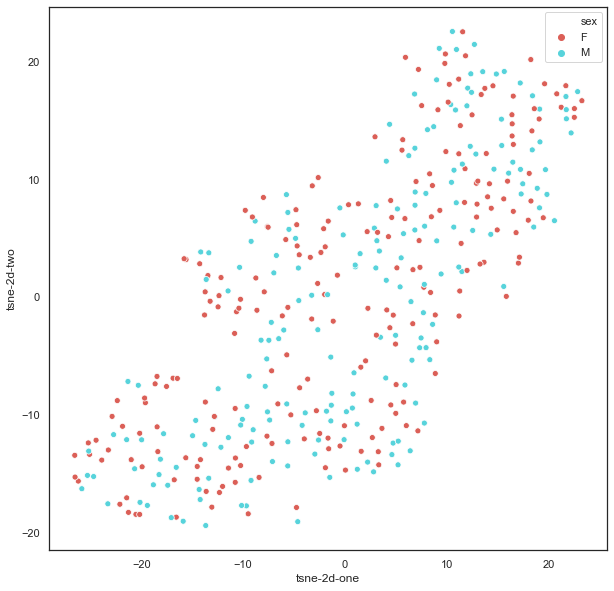

In [21]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "sex",
    palette = sns.color_palette("hls", 2),
    data = fclean
)
fig.figure.savefig("label by x and y.png",dpi = 300)

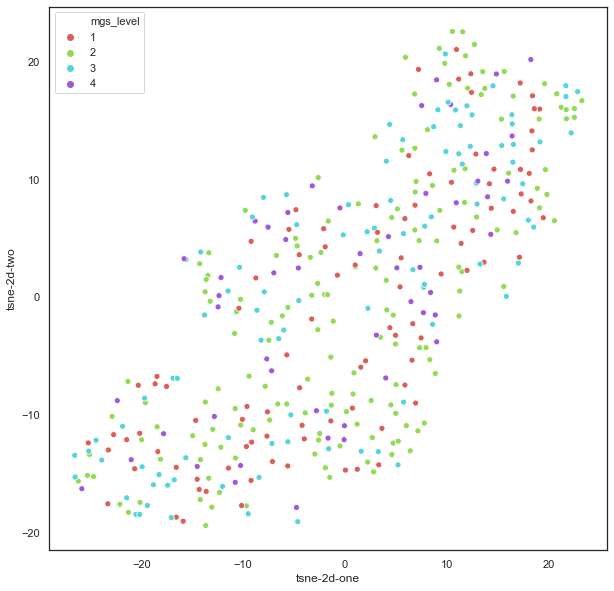

In [22]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls", 4),
    data = fclean
)
fig.figure.savefig("label mgs_level.png",dpi = 300)

In [23]:
fclean['age'].describe()

count    407.000000
mean      79.914005
std        9.878821
min       55.000000
25%       73.000000
50%       81.000000
75%       88.000000
max      107.000000
Name: age, dtype: float64

In [24]:
b = [50,60,70,80,90,110]
c = pd.cut(fclean['age'], b)

In [25]:
def get_stats(group):
    return {'count': group.count()}

grouped = fclean['age'].groupby(c)
bin_counts = grouped.apply(get_stats).unstack()
#print (bin_counts)
bin_counts

,count
age,
"(50, 60]",10
"(60, 70]",72
"(70, 80]",119
"(80, 90]",149
"(90, 110]",57


In [26]:
from math import floor, ceil

In [27]:
fclean['AGE'] = 0
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,14.183018,9.606679,0
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.651057,2.944344,0
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.163983,18.495775,0
7_3,89.0,F,3,332.0,500.0,254.0,11.0,85.62,166.0,418.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-5.318102,-10.019666,0
8_2,72.0,F,2,193.0,257.0,120.0,30.0,215.83,77.0,301.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.570566,-8.793653,0


In [28]:
#fclean['AGE'] = floor(fclean['age'].values / 10)
#fclean.head()

fclean['AGE'] = fclean['age'].map(lambda x: floor(x/10) * 10)
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,14.183018,9.606679,70
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.651057,2.944344,80
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.163983,18.495775,70
7_3,89.0,F,3,332.0,500.0,254.0,11.0,85.62,166.0,418.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-5.318102,-10.019666,80
8_2,72.0,F,2,193.0,257.0,120.0,30.0,215.83,77.0,301.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.570566,-8.793653,70


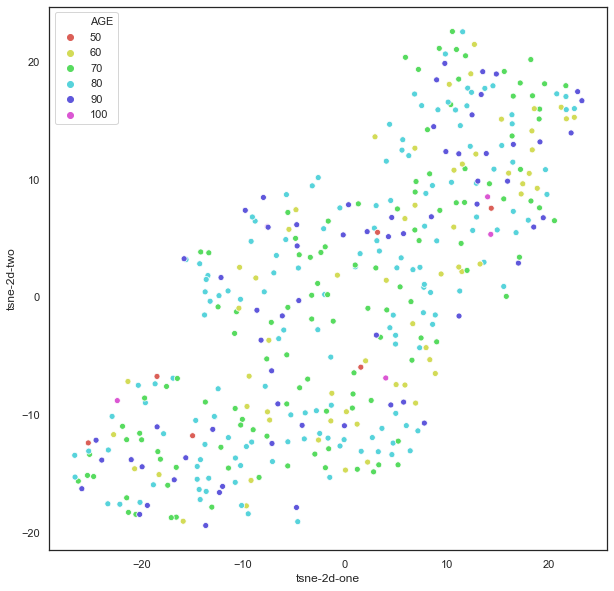

In [29]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "AGE",
    palette = sns.color_palette("hls", 6),
    data = fclean
)
fig.figure.savefig("age.png",dpi = 300)

# Dimension reduction for each stage

In [30]:
stage1 = fclean[fclean.index.str.contains('_1')]
stage1.head()


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,14.183018,9.606679,70
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.651057,2.944344,80
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.163983,18.495775,70
9_1,66.0,F,1,227.0,325.0,192.0,10.0,66.71,100.0,399.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,18.355474,14.097269,60
17_1,71.0,M,1,206.0,186.0,180.0,9.0,149.85,81.0,308.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,17.231024,10.829547,70


In [31]:
Y1 = TSNE(n_components = 2).fit_transform(stage1.drop(['tsne-2d-one','tsne-2d-two','AGE','age','sex','mgs_level'],axis=1))
Y1.shape

(97, 2)

In [32]:
stage1['t1_1'] = Y1[:,0]
stage1['t2_1'] = Y1[:,1]
stage1.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE,t1_1,t2_1
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,1,245.0,418.0,142.0,4.0,138.96,100.0,490.0,...,0.0,0.0,3.0,0.0,0.0,14.183018,9.606679,70,1.486808,3.631134
4_1,88.0,F,1,225.0,236.0,160.0,16.0,208.82,92.0,279.0,...,0.0,0.0,4.0,0.0,0.0,13.651057,2.944344,80,2.892641,2.541939
6_1,73.0,F,1,156.0,205.0,194.0,7.0,117.75,66.0,340.0,...,0.0,0.0,0.0,1.0,0.0,11.163983,18.495775,70,-0.047088,2.230123
9_1,66.0,F,1,227.0,325.0,192.0,10.0,66.71,100.0,399.0,...,0.0,0.0,3.0,0.0,0.0,18.355474,14.097269,60,0.448827,3.866994
17_1,71.0,M,1,206.0,186.0,180.0,9.0,149.85,81.0,308.0,...,0.0,0.0,2.0,0.0,0.0,17.231024,10.829547,70,1.779557,3.910282


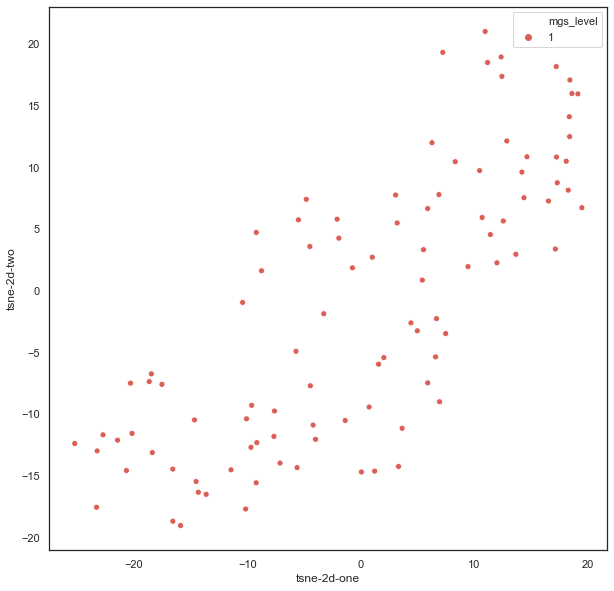

In [33]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls", 1),
    data = stage1
)
# fig.figure.savefig("label x and y.png",dpi = 300)

In [34]:
stage4 = fclean[fclean.index.str.contains('_4')]
stage4.head()


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE
r_id,,,,,,,,,,,,,,,,,,,,,
11_4,88.0,M,4,274.0,297.0,198.0,18.0,163.48,155.0,486.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.501860,7.557220,80
46_4,86.0,M,4,263.0,403.0,241.0,14.0,130.25,134.0,494.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,-0.088628,-12.124768,80
47_4,84.0,F,4,235.0,200.0,274.0,20.0,72.59,119.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.401542,0.375498,80
60_4,88.0,M,4,293.0,319.0,351.0,13.0,260.00,108.0,729.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.483258,3.673137,80
73_4,94.0,F,4,260.0,328.0,227.0,6.0,101.78,158.0,430.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.962242,9.829082,90


In [35]:
Y4 = TSNE(n_components = 2).fit_transform(stage4.drop(['tsne-2d-one','tsne-2d-two','AGE','age','sex','mgs_level'],axis=1))
Y4.shape

(52, 2)

In [36]:
stage4['t1_4'] = Y4[:,0]
stage4['t2_4'] = Y4[:,1]
stage4.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,mgs_level,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699,tsne-2d-one,tsne-2d-two,AGE,t1_4,t2_4
r_id,,,,,,,,,,,,,,,,,,,,,
11_4,88.0,M,4,274.0,297.0,198.0,18.0,163.48,155.0,486.0,...,0.0,0.0,0.0,0.0,0.0,-0.501860,7.557220,80,-74.755508,24.722782
46_4,86.0,M,4,263.0,403.0,241.0,14.0,130.25,134.0,494.0,...,0.0,0.0,3.0,0.0,0.0,-0.088628,-12.124768,80,16.891127,41.109528
47_4,84.0,F,4,235.0,200.0,274.0,20.0,72.59,119.0,401.0,...,0.0,0.0,0.0,0.0,0.0,8.401542,0.375498,80,11.717003,-0.365215
60_4,88.0,M,4,293.0,319.0,351.0,13.0,260.00,108.0,729.0,...,0.0,0.0,2.0,0.0,0.0,1.483258,3.673137,80,-44.678158,37.151550
73_4,94.0,F,4,260.0,328.0,227.0,6.0,101.78,158.0,430.0,...,0.0,0.0,0.0,0.0,0.0,15.962242,9.829082,90,-33.560909,-85.483841


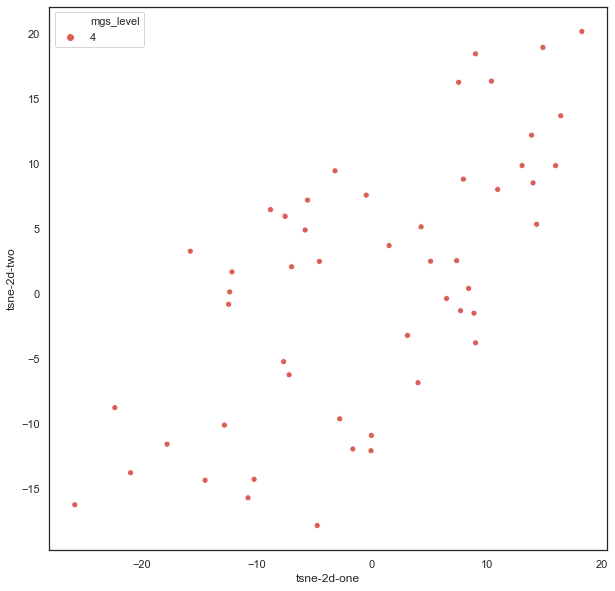

In [37]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls", 1),
    data = stage4
)
# fig.figure.savefig("label x and y.png",dpi = 300)